### K-Means Clustering
- Unsupervised learning
- Common clustering technique, helps to solve many problems efficiently
- K-Means is an example of hard clustering, where every pt. belongs only to one cluster

### Motivational problem -
**Problem statement** Given the list of locations of customers who frequently order Pizza we want to find out optimal
locations of Pizza Parlours where they should be opened

- **Step 1** Initialise k number of Pizza parlour randomly
- **Step 2(also called the E Step)** Assign each customer to its nearest Pizza center
- **Step 3(also called the M Steps)** Update the center location by taking mean of customers assigned to it
- **Step 4** Repeat step 2 and step 3 until convergence

### K-Means Algorithm
- **INPUT DATA:** X = {x1,x2,...,xN}
- **GOAL:** Partition the data among some K number of cluster. let us assume k is known to us

Let uk denote the center of kth cluster(uk will be a vector)

So we need to find an assignment of data points to cluster, as well as a set of cluster centers(uk), such that the sum
of the squares of the distances of each data point to its closet cluster center uk,is minimum

### Implementation

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

### Dataset implementation

In [65]:
X,y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

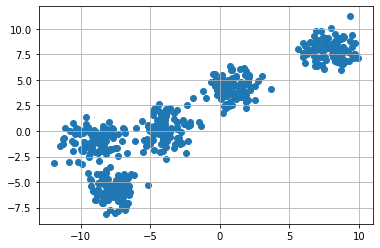

In [66]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [67]:
k = 5
color = ['green','red','blue','yellow','orange']

clusters = {}
# Step-1
for i in range(k):
    center  = 10*(2*np.random.random((X.shape[1],))-1)
    points = []

    cluster = {
        'center':center,
        'points':points,
        'color':color[i]
    }

    clusters[i] = cluster


In [68]:
def distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2)**2))

In [69]:
# Step-2
def assignPointTOClusters(clusters):  #E-Step
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]
        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)

        clusters[current_cluster]['points'].append(curr_x)

In [70]:
## There may be a chance that our points list in cluster dictionary is empty
# Implement M step
def updateCluster(clusters): # M-Step
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])

        if pts.shape[0]>0:  # to handle in case of some zero points case
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = []

def plotCluster(cluster):

    for kx in range(k):
        pts = np.array(clusters[kx]['points'])

        # plots the points
        try:
            plt.scatter(pts[:,0],pts[:,1],color= clusters[kx]['color'])
        except:
            pass

        #plot the cluster centers
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color='black',marker="*")

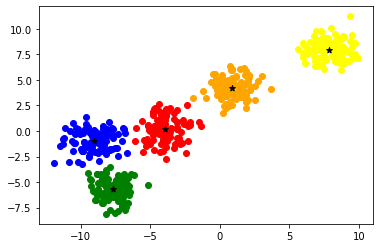

In [76]:
assignPointTOClusters(clusters)
plotCluster(clusters)
updateCluster(clusters)